In [ ]:
import kagglehub
import os
import pandas as pd

In [ ]:
path = kagglehub.dataset_download("lokeshparab/amazon-products-dataset")

print("Path to dataset files:", path)

100%|██████████| 79.7M/79.7M [00:00<00:00, 99.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lokeshparab/amazon-products-dataset/versions/2


In [ ]:
all_df = []
for i in os.listdir(path):
    df = pd.read_csv(os.path.join(path,i))
    all_df.append(df)

In [ ]:
df = pd.concat(all_df)

In [ ]:
df.drop(["Unnamed: 0", "image", "link"], inplace = True, axis = 1)

In [ ]:
df.head()

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,BATA Boys Scott Oxford,kids' fashion,Kids' Shoes,4.1,58,₹831,"₹1,299"
1,Mag Creations Kids Flip Flop Slipper for Girls...,kids' fashion,Kids' Shoes,NaN,NaN,₹398,₹450
2,Marvel Boy's Mapbss2124 Sandals,kids' fashion,Kids' Shoes,3.9,64,₹629,₹999
3,Neska Moda Baby Boys & Girls Cotton Anti Slip ...,kids' fashion,Kids' Shoes,NaN,NaN,₹199,₹599
4,Hopscotch Boys and Girls PVC Plastic Floral Ap...,kids' fashion,Kids' Shoes,NaN,NaN,₹738,"₹1,038"


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.groupby("no_of_ratings").count()

,name,main_category,sub_category,ratings,discount_price,actual_price
no_of_ratings,,,,,,
1.0,2,2,2,2,2,2
2.0,3,3,3,3,3,3
3.0,3,3,3,3,3,3
4.0,1,1,1,1,1,1
5.0,1,1,1,1,1,1
...,...,...,...,...,...,...
Usually dispatched in 4 to 5 weeks.,16,16,16,16,16,16
Usually dispatched in 5 to 6 days.,140,140,140,140,140,140
Usually dispatched in 6 to 7 days.,90,90,90,90,90,90


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 681360 entries, 0 to 1223
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            681360 non-null  object
 1   main_category   681360 non-null  object
 2   sub_category    681360 non-null  object
 3   ratings         681360 non-null  object
 4   no_of_ratings   681360 non-null  object
 5   discount_price  681360 non-null  object
 6   actual_price    681360 non-null  object
dtypes: object(7)
memory usage: 41.6+ MB


In [ ]:
df['no_of_ratings'] = df['no_of_ratings'].astype(str).str.replace(',', '.')

# Intentar convertir `no_of_ratings` a número (float), reemplazando texto con NaN
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')

# Eliminar filas donde `no_of_ratings` es NaN (originalmente contenían texto)
df = df.dropna(subset=['no_of_ratings'])

In [ ]:
df['discount_price'] = df['discount_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

In [ ]:
df['discount_price'] = pd.to_numeric(df['discount_price'], errors='coerce')
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')

df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

# Filtrar solo valores entre 1 y 5
df = df[(df['ratings'] >= 1) & (df['ratings'] <= 5)]

# Verificar los valores restantes en ratings
print(df['ratings'].unique())

[4.1 3.9 3.6 3.1 2.3 4.2 3.8 5.  3.5 4.  3.7 3.4 2.6 4.9 4.7 4.6 3.  4.3
 4.4 4.5 3.3 3.2 4.8 1.5 2.7 1.  2.1 2.5 1.9 2.4 1.6 2.9 2.  2.2 1.7 2.8
 1.4 1.8 1.3 1.2 1.1]


In [ ]:
df.groupby("main_category").count()

,name,sub_category,ratings,no_of_ratings,discount_price,actual_price
main_category,,,,,,
accessories,125738,125738,125738,125738,125738,125738
appliances,51094,51094,51094,51094,51094,51094
bags & luggage,6426,6426,6426,6426,6426,6426
beauty & health,13446,13446,13446,13446,13446,13446
car & motorbike,10312,10312,10312,10312,10312,10312
grocery & gourmet foods,4686,4686,4686,4686,4686,4686
home & kitchen,25048,25048,25048,25048,25048,25048
"home, kitchen, pets",24,24,24,24,24,24
industrial supplies,5184,5184,5184,5184,5184,5184


In [ ]:
df["no_of_ratings"]

,no_of_ratings
0,58.0
2,64.0
5,11.0
6,22.0
7,6.0
...,...
1219,32.0
1220,8.0
1221,17.0
1222,2.0


In [ ]:
df['discount_price'] = pd.to_numeric(df['discount_price'], errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Cargar el dataset
# Ver las primeras filas
print(df.head())

# Convertir ratings y número de valoraciones a valores numéricos
df['ratings'] = df['ratings'].astype(float)
df['no_of_ratings'] = df['no_of_ratings'].astype(str).str.replace(',', '', regex=True)
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')

                                                name  main_category  \
0                             BATA Boys Scott Oxford  kids' fashion   
2                    Marvel Boy's Mapbss2124 Sandals  kids' fashion   
5  Yellow Bee George Magic Brick Theme Sandals, Blue  kids' fashion   
6           crocs Unisex-Child Clsgltrcutiecgk Clogs  kids' fashion   
7  Radler Unisex Happy Day Blue Comfortable Flat ...  kids' fashion   

  sub_category  ratings  no_of_ratings  discount_price  actual_price  
0  Kids' Shoes      4.1           58.0           831.0        1299.0  
2  Kids' Shoes      3.9           64.0           629.0         999.0  
5  Kids' Shoes      3.6           11.0           649.0         749.0  
6  Kids' Shoes      4.1           22.0          2097.0        3295.0  
7  Kids' Shoes      3.1            6.0           199.0         399.0  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669926 entries, 0 to 1223
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            669926 non-null  object 
 1   main_category   669926 non-null  object 
 2   sub_category    669926 non-null  object 
 3   ratings         669926 non-null  float64
 4   no_of_ratings   669926 non-null  float64
 5   discount_price  669926 non-null  float64
 6   actual_price    669926 non-null  float64
dtypes: float64(4), object(3)
memory usage: 40.9+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Ejemplo de limpieza de precios si contienen símbolos (como "₹" y comas)
df['discount_price'] = df['discount_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

# Encoder para el nombre del producto
name_enc = LabelEncoder()
df['name_encoded'] = name_enc.fit_transform(df['name'])

# Encoder para main_category
main_category_enc = LabelEncoder()
df['main_category_encoded'] = main_category_enc.fit_transform(df['main_category'])

# Encoder para sub_category
sub_category_enc = LabelEncoder()
df['sub_category_encoded'] = sub_category_enc.fit_transform(df['sub_category'])

# Convertir ratings y no_of_ratings a float (si es que hay NaN, considerar imputarlos o eliminarlos)
df['ratings'] = df['ratings'].astype(float)
df['no_of_ratings'] = df['no_of_ratings'].astype(float)

# Normalización de valores entre 0 y 1
df['discount_price'] = df['discount_price'] / df['discount_price'].max()
df['actual_price'] = df['actual_price'] / df['actual_price'].max()
df['ratings'] = df['ratings'] / 5.0  # Suponiendo que el rating máximo es 5
df['no_of_ratings'] = df['no_of_ratings'] / df['no_of_ratings'].max()

# Dividir en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535940 entries, 878 to 3414
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   name                   535940 non-null  object 
 1   main_category          535940 non-null  object 
 2   sub_category           535940 non-null  object 
 3   ratings                535940 non-null  float64
 4   no_of_ratings          535940 non-null  float64
 5   discount_price         535940 non-null  float64
 6   actual_price           535940 non-null  float64
 7   name_encoded           535940 non-null  int64  
 8   main_category_encoded  535940 non-null  int64  
 9   sub_category_encoded   535940 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 45.0+ MB


In [ ]:
train_data

,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price,name_encoded,main_category_encoded,sub_category_encoded
878,Visko 112-Red Combination Screwdriver Set (Pac...,home & kitchen,Home Improvement,0.70,0.013013,0.000194,4.040404e-08,214489,6,53
9838,Apsis Synthetic Leather High Ankle Classic Boo...,men's shoes,Casual Shoes,0.90,0.002002,0.001704,7.170707e-07,19966,11,27
529402,Sidhidata Women's Floor Length Yellow Skirt - ...,women's clothing,Western Wear,0.74,0.038038,0.000639,3.029293e-07,183800,18,109
503241,Cubelelo QiYi Qiming Pyraminx Speedcube Puzzle...,toys & baby products,Toys & Games,0.90,0.640641,0.000383,1.716162e-07,50011,16,101
24885,"SpikeZone - Bird Feeder Hanging Grill, Bird Fe...",pet supplies,All Pet Supplies,0.92,0.026026,0.000454,1.725253e-07,188400,13,7
...,...,...,...,...,...,...,...,...,...,...
604,Dr. Beckmann Oven Cleaner Active Gel 375ml | U...,beauty & health,Household Supplies,0.78,0.004004,0.000319,4.535354e-08,58002,3,55
655,OJ Red Maratha Chandrakor Bindi Teeka Marathi ...,beauty & health,Make-up,1.00,0.001001,0.000183,4.030303e-08,139329,3,73
75472,Raise CCTV Camera Direct Pole Mounting Stand/B...,"tv, audio & cameras",Cameras,0.80,0.047047,0.000383,9.585859e-08,161929,17,20
16436,OOMPH Jewellery Green Meenakari & Pearls Large...,accessories,Fashion & Silver Jewellery,0.90,0.002002,0.000473,4.591919e-07,139976,0,36


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model

# ---------------------------
# Preprocesamiento y Encoders
# ---------------------------

# Supongamos que ya tienes cargado tu DataFrame 'df'
# Ejemplo de limpieza de precios si contienen símbolos (como "₹" y comas)
df['discount_price'] = df['discount_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace({'₹': '', ',': ''}, regex=True).astype(float)

# Encoder para el nombre del producto
name_enc = LabelEncoder()
df['name_encoded'] = name_enc.fit_transform(df['name'])

# Encoder para main_category
main_category_enc = LabelEncoder()
df['main_category_encoded'] = main_category_enc.fit_transform(df['main_category'])

# Encoder para sub_category
sub_category_enc = LabelEncoder()
df['sub_category_encoded'] = sub_category_enc.fit_transform(df['sub_category'])

# Convertir ratings y no_of_ratings a float (asegúrate de manejar o imputar los NaN si existen)
df['ratings'] = df['ratings'].astype(float)
df['no_of_ratings'] = df['no_of_ratings'].astype(float)

# Normalización de variables
df['discount_price'] = df['discount_price'] / df['discount_price'].max()
df['actual_price'] = df['actual_price'] / df['actual_price'].max()
df['ratings'] = df['ratings'] / 5.0  # Suponiendo rating máximo 5
df['no_of_ratings'] = df['no_of_ratings'] / df['no_of_ratings'].max()

# Dividir en conjunto de entrenamiento y prueba
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# ---------------------------
# Definición del Modelo
# ---------------------------

# Parámetros para los embeddings
embedding_dim_product = 50
embedding_dim_category = 10

num_products = df['name_encoded'].nunique()
num_main_categories = df['main_category_encoded'].nunique()
num_sub_categories = df['sub_category_encoded'].nunique()

# Definir entradas
product_input = Input(shape=(1,), name="product_input")
main_cat_input = Input(shape=(1,), name="main_cat_input")
sub_cat_input = Input(shape=(1,), name="sub_cat_input")
# Usamos 3 características numéricas: discount_price, actual_price y no_of_ratings
numeric_input = Input(shape=(3,), name="numeric_input")

# Embedding para el ID del producto
product_embedding = Embedding(input_dim=num_products, output_dim=embedding_dim_product, name="product_embedding")(product_input)
product_vector = Flatten()(product_embedding)

# Embedding para main_category
main_cat_embedding = Embedding(input_dim=num_main_categories, output_dim=embedding_dim_category, name="main_cat_embedding")(main_cat_input)
main_cat_vector = Flatten()(main_cat_embedding)

# Embedding para sub_category
sub_cat_embedding = Embedding(input_dim=num_sub_categories, output_dim=embedding_dim_category, name="sub_cat_embedding")(sub_cat_input)
sub_cat_vector = Flatten()(sub_cat_embedding)

# Concatenar todas las representaciones
merged = Concatenate()([product_vector, main_cat_vector, sub_cat_vector, numeric_input])

# Capas densas
x = Dense(128, activation='relu')(merged)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='linear', name="output")(x)

# Definir y compilar el modelo
model = Model(inputs=[product_input, main_cat_input, sub_cat_input, numeric_input], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# ---------------------------
# Preparación de Datos para el Fit
# ---------------------------

# Entradas para el entrenamiento
X_train_product = train_data['name_encoded'].values
X_train_main_cat = train_data['main_category_encoded'].values
X_train_sub_cat = train_data['sub_category_encoded'].values
X_train_numeric = train_data[['discount_price', 'actual_price', 'no_of_ratings']].values

# Variable objetivo: ratings (normalizado)
y_train = train_data['ratings'].values

# ---------------------------
# Ajuste (Fit) del Modelo
# ---------------------------

history = model.fit(
    [X_train_product, X_train_main_cat, X_train_sub_cat, X_train_numeric],
    y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.1
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ product_input             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ main_cat_input            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sub_cat_input             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ product_embedding         │ (None, 1, 50)          │     11,867,600 │ product_input[0][0]    │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ main_cat_embedding        │ (None, 1, 10)          │            200 │ main_cat_input[0][0]   │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sub_cat_embedding         │ (None, 1, 10)          │          1,120 │ sub_cat_input[0][0]    │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 50)             │              0 │ product_embedding[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 10)             │              0 │ main_cat_embedding[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 10)             │              0 │ sub_cat_embedding[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ numeric_input             │ (None, 3)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 73)             │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0],       │
│                           │                        │                │ flatten_2[0][0],       │
│                           │                        │                │ numeric_input[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │          9,472 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 64)             │          8,256 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)  

 Total params: 11,886,713 (45.34 MB)

 Trainable params: 11,886,713 (45.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
15074/15074 ━━━━━━━━━━━━━━━━━━━━ 86s 5ms/step - loss: 9.7024e-04 - mae: 0.0215 - val_loss: 4.9924e-04 - val_mae: 0.0145
Epoch 2/25
15074/15074 ━━━━━━━━━━━━━━━━━━━━ 139s 5ms/step - loss: 3.0307e-04 - mae: 0.0113 - val_loss: 3.4752e-04 - val_mae: 0.0113
Epoch 3/25
15074/15074 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 1.8148e-04 - mae: 0.0084 - val_loss: 2.9611e-04 - val_mae: 0.0096
Epoch 4/25
15074/15074 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 1.4662e-04 - mae: 0.0072 - val_loss: 2.9004e-04 - val_mae: 0.0095
Epoch 5/25
15074/15074 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - loss: 1.3369e-04 - mae: 0.0067 - val_loss: 2.8174e-04 - val_mae: 0.0090
Epoch 6/25
15074/15074 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - loss: 1.2383e-04 - mae: 0.0063 - val_loss: 2.6973e-04 - val_mae: 0.0083
Epoch 7/25
15074/15074 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 1.2127e-04 - mae: 0.0061 - val_loss: 2.6972e-04 - val_mae: 0.0081
Epoch 8/25
15074/15074 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 1.1652e-04 - mae

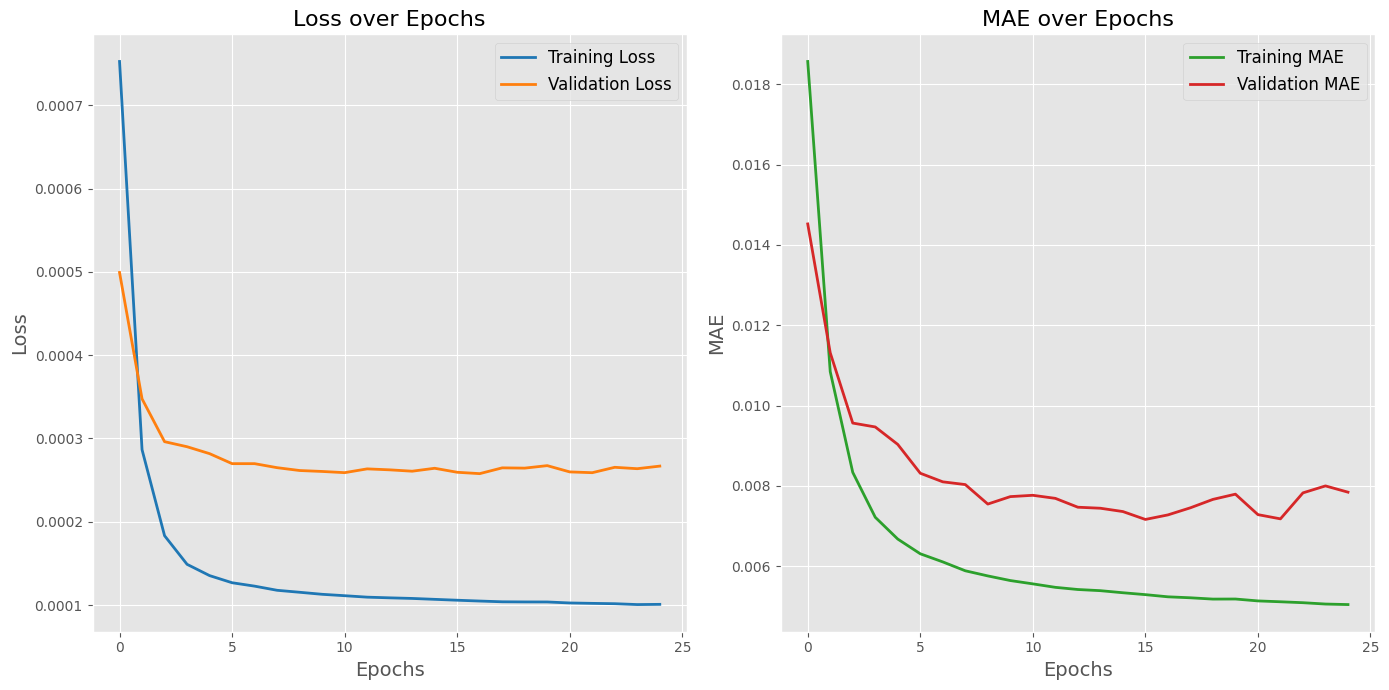

In [ ]:
import matplotlib.pyplot as plt

# Establecer el estilo de la gráfica
plt.style.use('ggplot')

# Graficar el loss y el mae desde el historial del entrenamiento
plt.figure(figsize=(14, 7))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='tab:blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='tab:orange', linewidth=2)
plt.title('Loss over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# MAE (Mean Absolute Error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE', color='tab:green', linewidth=2)
plt.plot(history.history['val_mae'], label='Validation MAE', color='tab:red', linewidth=2)
plt.title('MAE over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Extraer pesos de la capa de embedding del producto
prod_weights = model.get_layer("product_embedding").get_weights()[0]  # Shape: (num_products, embedding_dim_product)

# Crear un diccionario para mapear el ID del producto (name_encoded) a su nombre
id_to_name = df[['name_encoded', 'name']].drop_duplicates().set_index('name_encoded')['name'].to_dict()

# Ejemplo: Recomendar para el producto con ID 10
producto_id = 10

In [ ]:
# Extraer pesos de las capas de embedding para categorías
main_weights = model.get_layer("main_cat_embedding").get_weights()[0]  # Shape: (num_main_categories, embedding_dim_category)
sub_weights = model.get_layer("sub_cat_embedding").get_weights()[0]    # Shape: (num_sub_categories, embedding_dim_category)

def get_vector_combinado(product_id):
    """
    Retorna un vector combinado para un producto dado, concatenando:
    - Embedding del producto
    - Embedding de la main_category
    - Embedding de la sub_category
    """
    # Extraer una fila del DataFrame que corresponda al producto (asumiendo que cada producto aparece una vez)
    row = df[df['name_encoded'] == product_id].iloc[0]
    main_cat = int(row['main_category_encoded'])
    sub_cat = int(row['sub_category_encoded'])

    vec_prod = prod_weights[product_id]
    vec_main = main_weights[main_cat]
    vec_sub = sub_weights[sub_cat]

    return np.concatenate([vec_prod, vec_main, vec_sub])

# Pre-calcular los vectores combinados para todos los productos
num_products = prod_weights.shape[0]
combined_embeddings = np.array([get_vector_combinado(pid) for pid in range(num_products)])

def recomendar_productos_combinados(product_id, top_n=5):
    """
    Recomienda productos basados en el vector combinado (producto + categorías).
    """
    query_vec = combined_embeddings[product_id].reshape(1, -1)
    similitudes = cosine_similarity(query_vec, combined_embeddings)[0]
    indices_similares = np.argsort(-similitudes)
    indices_similares = [i for i in indices_similares if i != product_id]
    return indices_similares[:top_n]

# Ejemplo: Recomendar para el producto con ID 10 usando el vector combinado
recomendados_combinados = recomendar_productos_combinados(producto_id, top_n=5)
print("\nRecomendaciones (basado en vector combinado):")
for pid in recomendados_combinados:
    print(id_to_name.get(pid, f"ID {pid}"))


Recomendaciones (basado en vector combinado):
RIVER by Narendra Kumar Premium Designer Women's Paisley Print Salwar Suit Set
Abhi Women's Cotton Half Sleeve Blouse
NanoEdge Women's For Girls Silicone Non-Wired Stick-on Bra 1 Pair
Studio Shringaar Women's Polyester Elbow Length Sleeves Gota Embroidered Padded Saree Blouse
Sampton Best Women's bra panty Case Travel Portable Storage Bag Box Protect Bra Panty Lingerie Organizer (Colour May Vary)


In [ ]:
import pickle
import numpy as np

# 1. Guardar los LabelEncoders
with open('name_encoder.pkl', 'wb') as f:
    pickle.dump(name_enc, f)
with open('main_category_encoder.pkl', 'wb') as f:
    pickle.dump(main_category_enc, f)
with open('sub_category_encoder.pkl', 'wb') as f:
    pickle.dump(sub_category_enc, f)

# 2. Guardar los factores de escalado
scaling_factors = {
    'discount_price_max': df['discount_price'].max(),  # O el valor original antes de normalizar, si lo tienes
    'actual_price_max': df['actual_price'].max(),
    'no_of_ratings_max': df['no_of_ratings'].max()
}
with open('scaling_factors.pkl', 'wb') as f:
    pickle.dump(scaling_factors, f)

# 3. Guardar el diccionario de mapeo de IDs a nombres
id_to_name = df[['name_encoded', 'name']].drop_duplicates().set_index('name_encoded')['name'].to_dict()
with open('id_to_name.pkl', 'wb') as f:
    pickle.dump(id_to_name, f)

# 4. Guardar el modelo (ya que lo tienes en formato .keras, se guarda así)
model.save("tu_modelo.keras")

# 5. (Opcional) Guardar los pesos de los embeddings y el vector combinado
prod_weights = model.get_layer("product_embedding").get_weights()[0]
np.save('prod_weights.npy', prod_weights)

main_weights = model.get_layer("main_cat_embedding").get_weights()[0]
np.save('main_weights.npy', main_weights)

sub_weights = model.get_layer("sub_cat_embedding").get_weights()[0]
np.save('sub_weights.npy', sub_weights)

# Función para obtener vector combinado (producto + categorías)
def get_vector_combinado(product_id):
    # Asegúrate de que este proceso sea idéntico al que usaste en entrenamiento
    row = df[df['name_encoded'] == product_id].iloc[0]
    main_cat = int(row['main_category_encoded'])
    sub_cat = int(row['sub_category_encoded'])
    vec_prod = prod_weights[product_id]
    vec_main = main_weights[main_cat]
    vec_sub = sub_weights[sub_cat]
    return np.concatenate([vec_prod, vec_main, vec_sub])

num_products = prod_weights.shape[0]
combined_embeddings = np.array([get_vector_combinado(pid) for pid in range(num_products)])
np.save('combined_embeddings.npy', combined_embeddings)